In [25]:
%matplotlib inline
from utils_all import *

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

# Exploratory data analysis I

In [2]:
%store -r DATA_NUM_CL_WITH_NAN_TXT_XY

In [3]:
data = DATA_NUM_CL_WITH_NAN_TXT_XY

In [4]:
data.head()

,url,meta_name,text,tag,color_r,color_g,color_b,font_size,display,font_weight,...,height,width,text_len,num_punctuation,num_digits,digits_share,num_upper,num_whitespace,x_center,y_center
3,http://www.ticketbis.com/ar/entradas-schalke-0...,name,FC Ingolstadt - Schalke 04,26,94.0,103.0,113.0,11.0,4,400,...,-1.0,-1.0,26.0,1.0,2.0,0.076923,4.0,4.0,107.5,1252.0
8,http://www.chicagoparkdistrict.com/parks/Galew...,name,Movie Inside the Park at Mayfair Park,26,51.0,51.0,51.0,26.0,4,300,...,-1.0,-1.0,37.0,0.0,0.0,0.000000,5.0,6.0,193.5,230.0
10,http://www.chicagoparkdistrict.com/parks/Galew...,location,Mayfair Park 4550 W. S...,22,0.0,0.0,0.0,13.0,3,400,...,100.0,370.0,NaN,6.0,NaN,0.126667,7.0,NaN,200.0,363.0
11,http://www.chicagoparkdistrict.com/parks/Scott...,name,Night Out: Movies in the Parks at Sauganash,26,51.0,51.0,51.0,26.0,4,300,...,-1.0,-1.0,43.0,1.0,0.0,0.000000,5.0,7.0,196.5,230.0
14,http://www.chicagoparkdistrict.com/parks/Scott...,description,The Land Before TimeFive orphan dinosaurs trav...,26,0.0,0.0,0.0,13.0,4,400,...,-1.0,-1.0,NaN,6.0,6.0,0.023715,13.0,NaN,200.0,578.0


In [5]:
data.shape

(167872, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167872 entries, 3 to 1597709
Data columns (total 32 columns):
url                167872 non-null object
meta_name          167872 non-null object
text               167872 non-null object
tag                167872 non-null int64
color_r            167872 non-null float64
color_g            167872 non-null float64
color_b            167872 non-null float64
font_size          167872 non-null float64
display            167872 non-null int64
font_weight        167872 non-null int64
padding_top        167872 non-null float64
padding_right      167872 non-null float64
padding_left       167872 non-null float64
padding_bottom     167872 non-null float64
font_family        167872 non-null int64
text_align         167872 non-null int64
line_height        167872 non-null float64
num_siblings       161546 non-null float64
x_coords           167066 non-null float64
y_coords           165747 non-null float64
block_height       164151 non-null float6

### URL by meta name

Popularity of each event component (meta_name)

In [7]:
data.meta_name.value_counts()

not_event_element    135665
name                  18116
startDate              6105
location               5780
description            2206
Name: meta_name, dtype: int64

In [8]:
data['count'] = 1

Event components for every URL

In [9]:
url_by_meta = data[['url', 'meta_name', 'count']].groupby(by=['url', 'meta_name']).agg('count')

In [10]:
url_by_meta.head()

count
url                                                meta_name               
://mysunshinecoast.com.au/events/events-display... not_event_element      1
http://10times.com/anaheim-us/tradeshows           location               1
                                                   name                   1
                                                   startDate              1
http://10times.com/barcelona-es/tradeshows         location               1

### Combinations of event component for one URL

In [11]:
def sort_list(x):
    return sorted(list(x))

In [12]:
url_by_meta_list = data[data.meta_name != 'not_event_element'].groupby('url')['meta_name'].apply(sort_list).to_frame().reset_index()

In [13]:
url_by_meta_list.head()

,url,meta_name
0,http://10times.com/anaheim-us/tradeshows,"[location, name, startDate]"
1,http://10times.com/barcelona-es/tradeshows,"[location, name, startDate]"
2,http://10times.com/brandon-ca/tradeshows,"[location, name, startDate]"
3,http://10times.com/cosmetics/tradeshows,"[location, name, startDate]"
4,http://10times.com/ecuador/tradeshows,"[location, name, startDate]"


In [14]:
url_by_meta_list.meta_name = url_by_meta_list.meta_name.apply(str)

In [15]:
event_comp_comb = url_by_meta_list.meta_name.value_counts().to_frame().reset_index()
event_comp_comb.columns = ['combination', 'count']

In [16]:
event_comp_comb.head(10)

,combination,count
0,['name'],8335
1,"['location', 'name']",2863
2,"['name', 'startDate']",2522
3,"['location', 'name', 'startDate']",1735
4,"['description', 'name']",730
5,"['description', 'name', 'startDate']",548
6,"['description', 'location', 'name']",485
7,"['description', 'location', 'name', 'startDate']",293
8,"['name', 'startDate', 'startDate']",246
9,"['location', 'name', 'startDate', 'startDate']",125


### Visualization of event components

In [17]:
urls_3_comp = url_by_meta_list[url_by_meta_list.meta_name == "['location', 'name', 'startDate']"].url

In [18]:
data_3comp = data[data.url.isin(urls_3_comp)]

In [20]:
data_3comp.shape

(5205, 33)

In [49]:
data_3comp_xy = data_3comp[['x_center','y_center','meta_name', 'url']].drop_duplicates(subset=['x_center'])

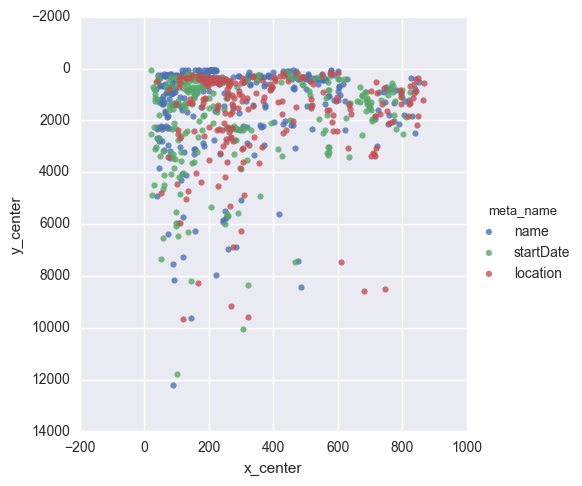

In [51]:
sns.lmplot('x_center', 'y_center', data=data_3comp_xy, hue='meta_name', fit_reg=False)
plt.gca().invert_yaxis()

### Number of element components per URL

Rows of URLs with event component aggregated by number of event components on a page

In [17]:
event_comp_by_meta_num = data[data.meta_name != 'not_event_element'][['url', 'count']].groupby(by=['url']).agg('count')

In [18]:
event_comp_by_meta_num.head()

,count
url,
http://10times.com/anaheim-us/tradeshows,3
http://10times.com/barcelona-es/tradeshows,3
http://10times.com/brandon-ca/tradeshows,3
http://10times.com/cosmetics/tradeshows,3
http://10times.com/ecuador/tradeshows,3


The average number of event components on a page

In [19]:
event_comp_by_meta_num.reset_index()[['count']].mean()

count    1.77733
dtype: float64

### Number of domain and Number of URLs per domain

In [20]:
def get_domain(url):
    parts = url.split('//', 1)
    return parts[1].split('/', 1)[0].replace('www.','')
data['domain'] = data.url.apply(get_domain)

In [22]:
url_per_domain = data[['domain','url']].groupby(by=['domain']).agg('count')

Average number of URLs per domain name

In [23]:
url_per_domain.url.mean()

43.16585240421702

Number of domain names

In [24]:
url_per_domain.head()

,url
domain,
109academy.com,1
10times.com,86
1418now.org.uk,3
17.de,3
2012.candidate-comparison.org,40


Number of domains

In [25]:
url_per_domain.shape

(3889, 1)

### Summary statistics

In [26]:
data.shape

(167872, 34)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167872 entries, 3 to 1597709
Data columns (total 34 columns):
url                167872 non-null object
meta_name          167872 non-null object
text               167872 non-null object
tag                167872 non-null int64
color_r            167872 non-null float64
color_g            167872 non-null float64
color_b            167872 non-null float64
font_size          167872 non-null float64
display            167872 non-null int64
font_weight        167872 non-null int64
padding_top        167872 non-null float64
padding_right      167872 non-null float64
padding_left       167872 non-null float64
padding_bottom     167872 non-null float64
font_family        167872 non-null int64
text_align         167872 non-null int64
line_height        167872 non-null float64
num_siblings       161546 non-null float64
x_coords           167066 non-null float64
y_coords           165747 non-null float64
block_height       164151 non-null float6

In [28]:
data_obj = data.select_dtypes(['object'])
data_obj['meta_name'] = data['meta_name'] 

In [29]:
data_num = data.select_dtypes(['int64', 'float64'])
data_num['meta_name'] = data['meta_name'] 
data_num = data_num.fillna(data_num.mean())

In [30]:
data_obj.describe()

,url,meta_name,text,domain
count,167872,167872,167872,167872
unique,19264,5,61860,3889
top,https://goldcoasttickets.com/theatre/aladdin-t...,not_event_element,NY,goldcoasttickets.com
freq,5611,135665,1609,29278


In [31]:
data_num[['color_r', 'font_size', 'font_weight', 'digits_share', 'block_height']].describe()

,color_r,font_size,font_weight,digits_share,block_height
count,167872.000000,167872.00000,167872.000000,167872.000000,167872.000000
mean,76.396201,14.69536,455.510746,0.112503,26.359833
std,84.989934,4.15742,129.067880,0.225118,18.612600
min,0.000000,0.00000,100.000000,0.000000,0.000000
25%,4.000000,13.00000,400.000000,0.000000,16.000000
50%,51.000000,14.00000,400.000000,0.000000,19.000000
75%,125.000000,16.00000,400.000000,0.117021,31.000000
max,255.000000,100.00000,900.000000,1.000000,194.000000


### Textual features

In [59]:
data.columns

Index(['url', 'meta_name', 'text', 'tag', 'color_r', 'color_g', 'color_b',
       'font_size', 'display', 'font_weight', 'padding_top', 'padding_right',
       'padding_left', 'padding_bottom', 'font_family', 'text_align',
       'line_height', 'num_siblings', 'x_coords', 'y_coords', 'block_height',
       'block_width', 'height', 'width', 'text_len', 'num_punctuation',
       'num_digits', 'digits_share', 'num_upper', 'num_whitespace', 'x_center',
       'y_center', 'count', 'domain'],
      dtype='object')

In [71]:
data_textual = data[['meta_name','text_len', 'num_punctuation',
       'num_digits', 'digits_share', 'num_upper', 'num_whitespace']]

data_textual = data_textual.fillna(data_textual.mean())

In [86]:
data_textual[data_textual.meta_name == 'not_event_element'].meta_name = 'not_event'

In [87]:
data_textual.head()

,meta_name,text_len,num_punctuation,num_digits,digits_share,num_upper,num_whitespace
3,name,26.00000,1.0,2.000000,0.076923,4.0,4.000000
8,name,37.00000,0.0,0.000000,0.000000,5.0,6.000000
10,location,23.02083,6.0,1.619198,0.126667,7.0,2.653402
11,name,43.00000,1.0,0.000000,0.000000,5.0,7.000000
14,description,23.02083,6.0,6.000000,0.023715,13.0,2.653402


In [88]:
textual_stat = data_textual.groupby('meta_name').describe()

In [89]:
textual_stat.columns = ['digit_share', 'num_digit', 'num_punc', 'num_upp',
       'num_white', 'text_len']

In [90]:
textual_stat = textual_stat.round(2)

In [91]:
textual_stat.to_latex(open('textualDistr', 'w'))

## Visualization

In [32]:
import seaborn as sns

In [33]:
def plot_feature_by_class(data, feature_name, group):
    fig = data[[feature_name, group]].hist(by=data[group])
    pl.suptitle("{} grouped by {}".format(feature_name, group), fontsize=14, verticalalignment='bottom')
    pl.subplots_adjust(hspace=.9)

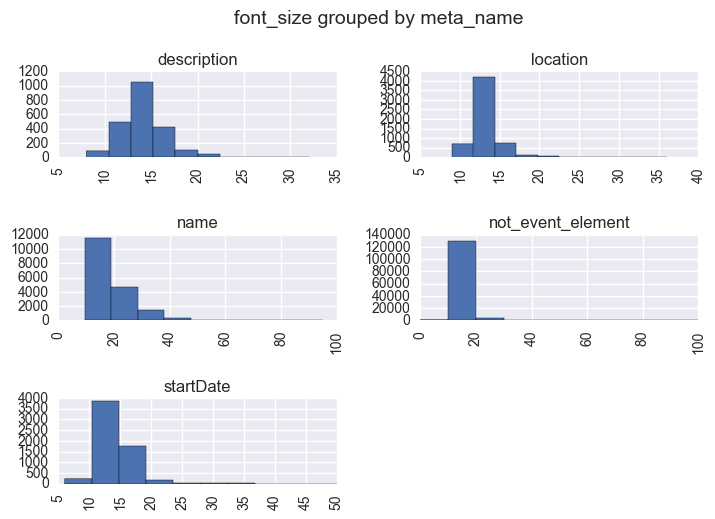

In [34]:
plot_feature_by_class(data, 'font_size', 'meta_name')

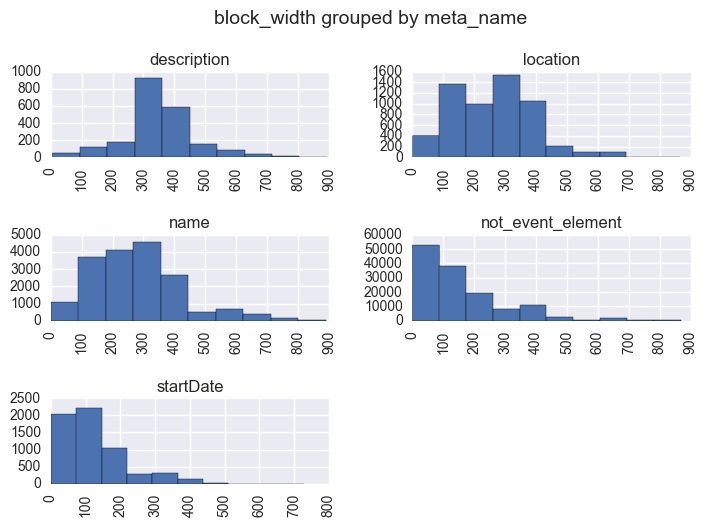

In [35]:
plot_feature_by_class(data, 'block_width', 'meta_name')

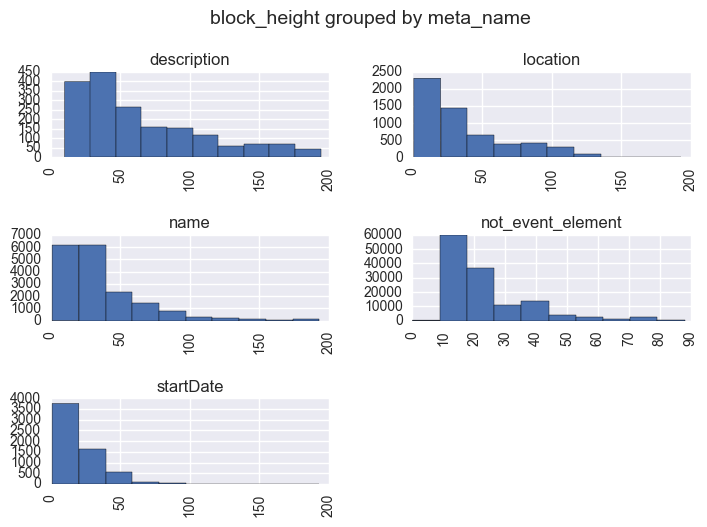

In [36]:
plot_feature_by_class(data, 'block_height', 'meta_name')

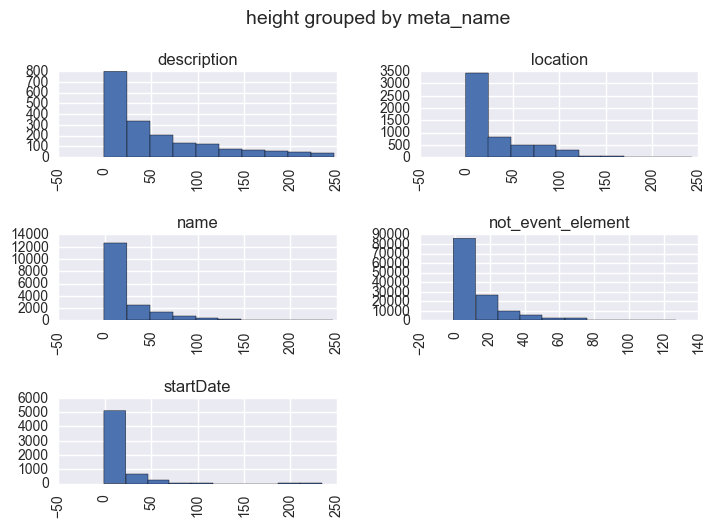

In [37]:
plot_feature_by_class(data, 'height', 'meta_name')

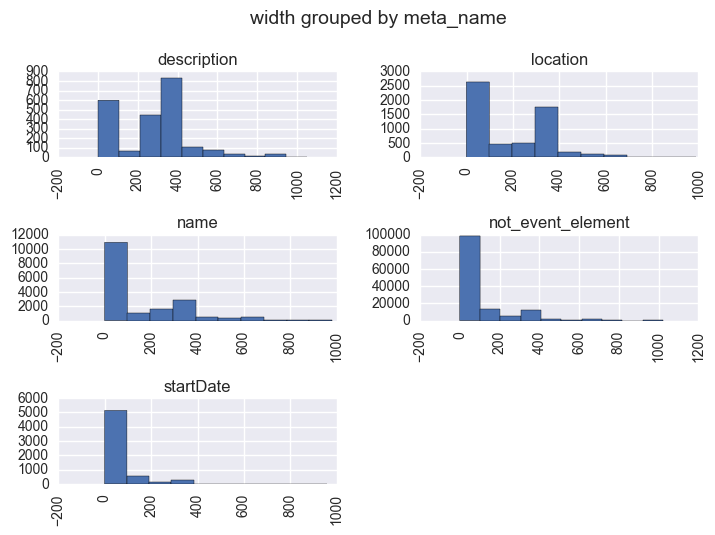

In [38]:
plot_feature_by_class(data, 'width', 'meta_name')

### Text length and event component

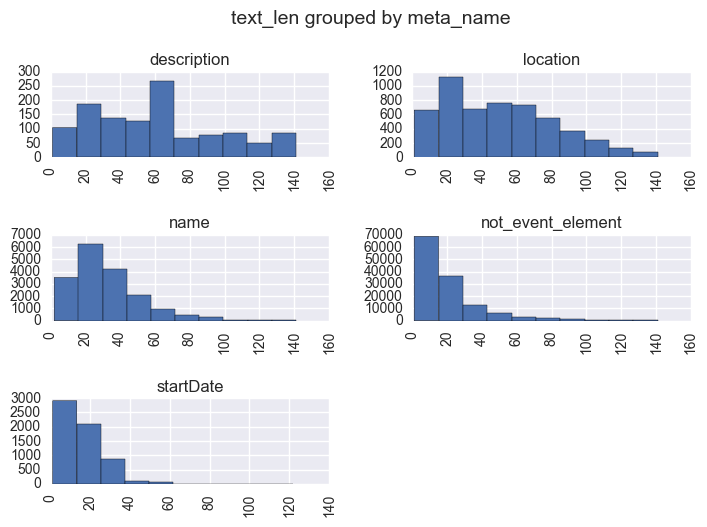

In [39]:
plot_feature_by_class(data, 'text_len', 'meta_name')

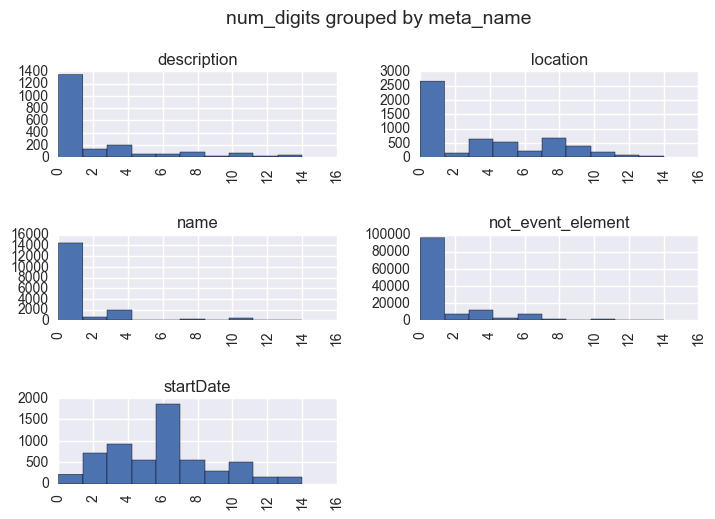

In [42]:
plot_feature_by_class(data, 'num_digits', 'meta_name')

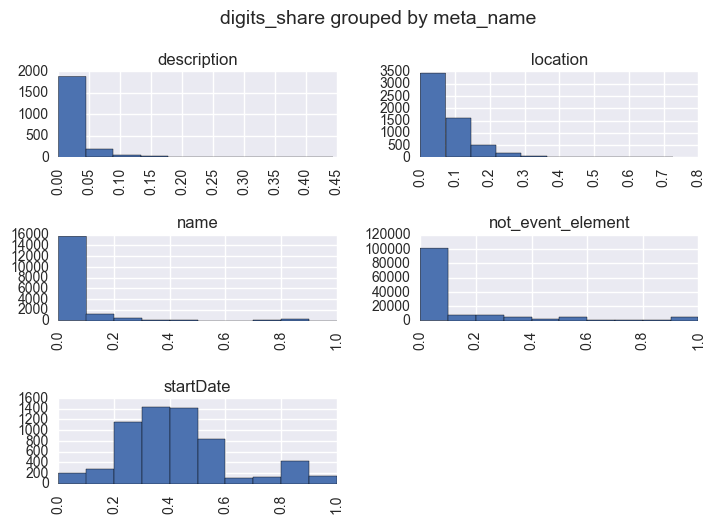

In [43]:
plot_feature_by_class(data, 'digits_share', 'meta_name')

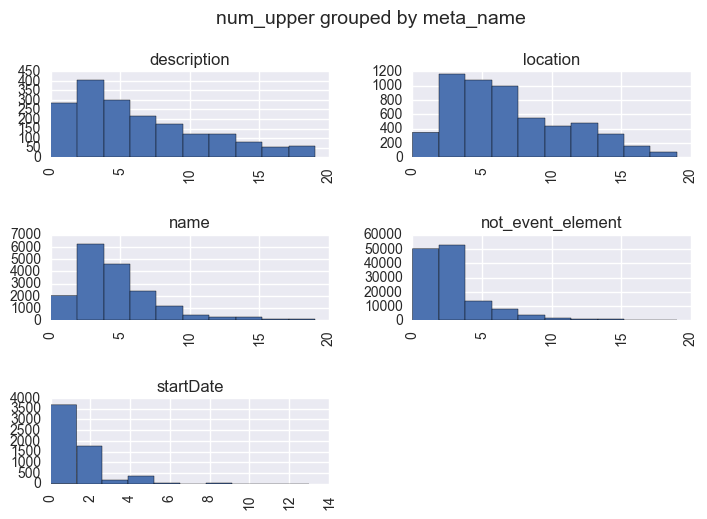

In [44]:
plot_feature_by_class(data, 'num_upper', 'meta_name')

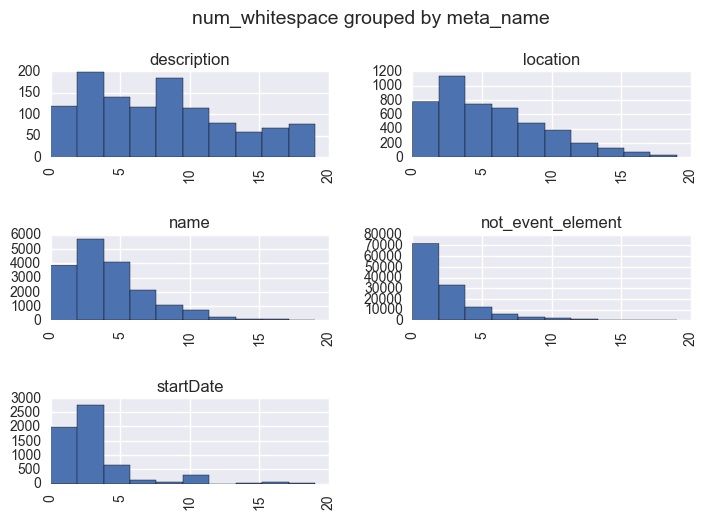

In [45]:
plot_feature_by_class(data, 'num_whitespace', 'meta_name')

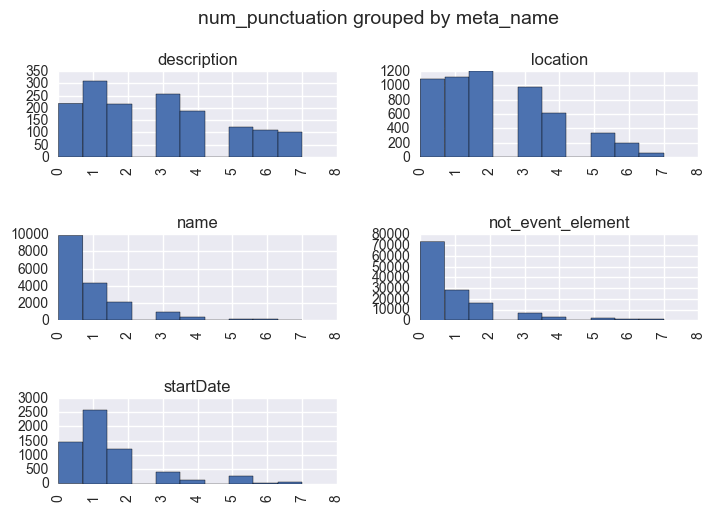

In [46]:
plot_feature_by_class(data, 'num_punctuation', 'meta_name')

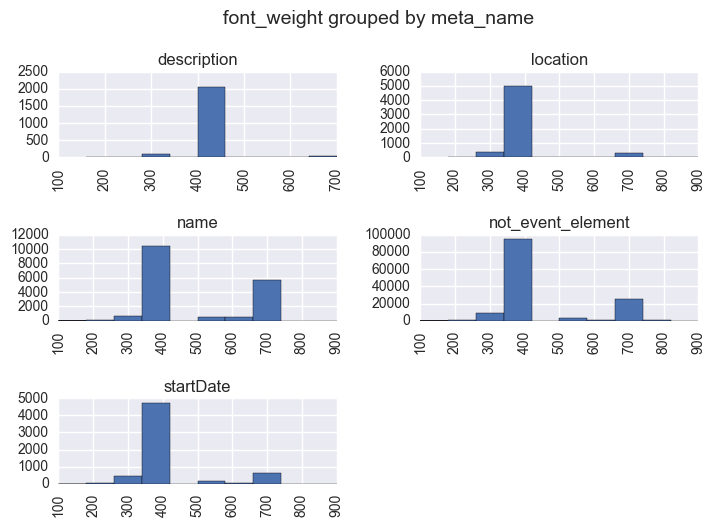

In [47]:
plot_feature_by_class(data, 'font_weight', 'meta_name') 

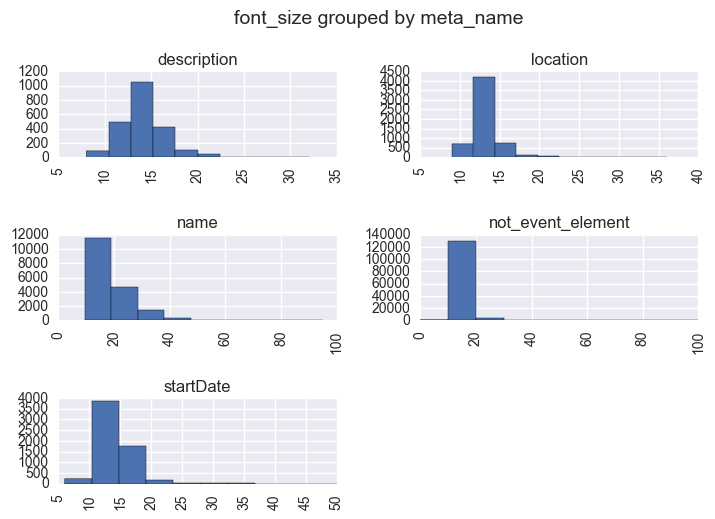

In [48]:
plot_feature_by_class(data, 'font_size', 'meta_name') 

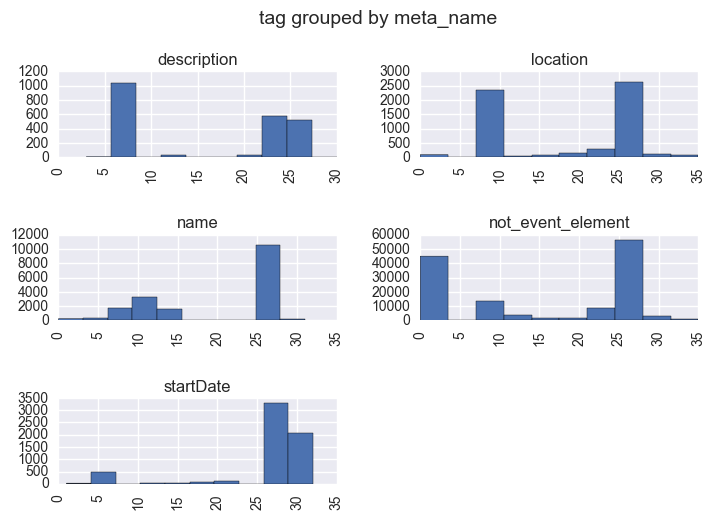

In [49]:
plot_feature_by_class(data, 'tag', 'meta_name') 


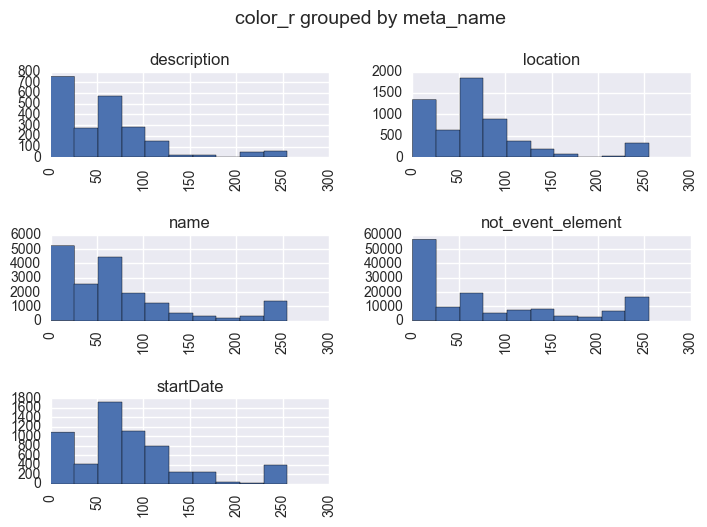

In [50]:
plot_feature_by_class(data, 'color_r', 'meta_name')

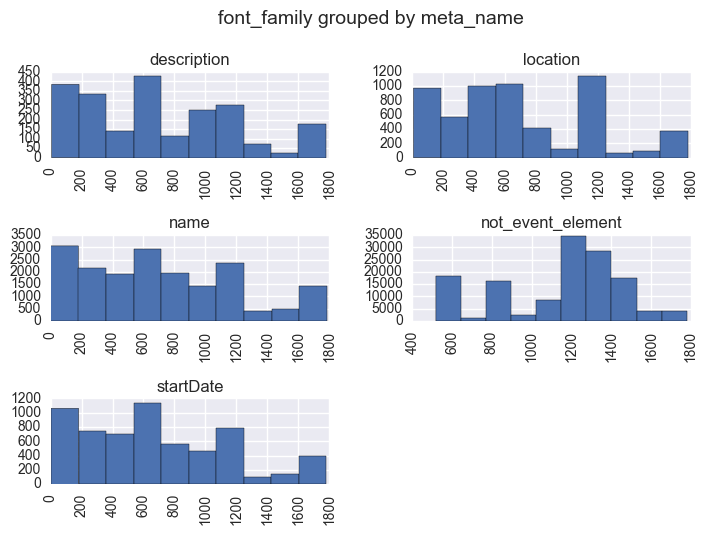

In [51]:
plot_feature_by_class(data, 'font_family', 'meta_name')

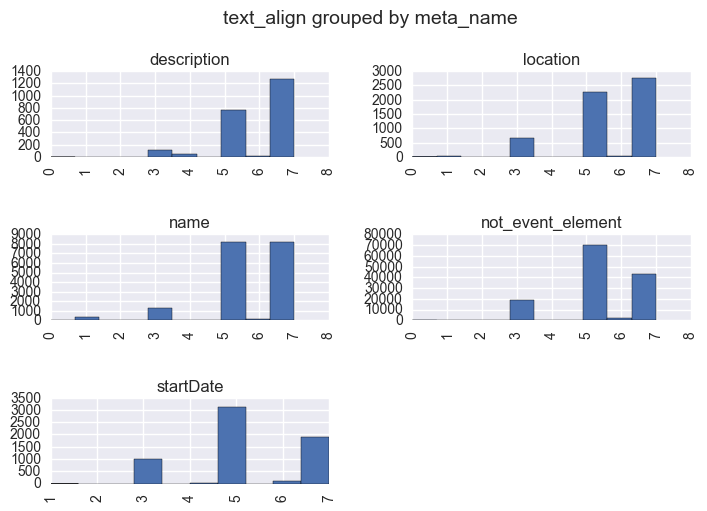

In [52]:
plot_feature_by_class(data, 'text_align', 'meta_name')

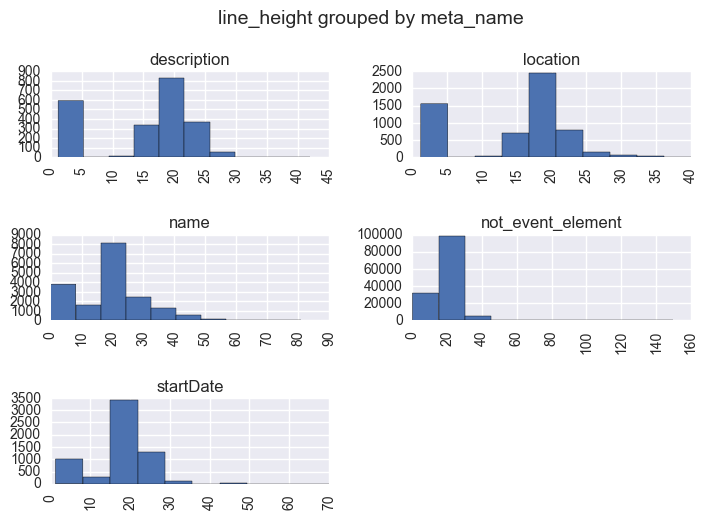

In [53]:
plot_feature_by_class(data, 'line_height', 'meta_name')

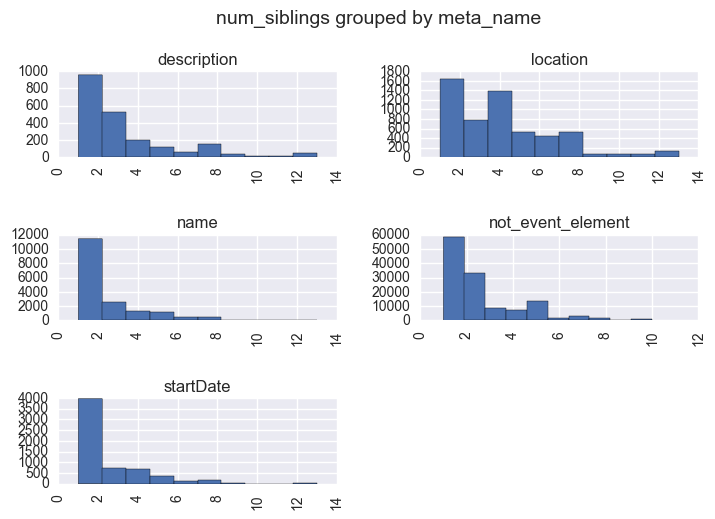

In [54]:
plot_feature_by_class(data, 'num_siblings', 'meta_name')

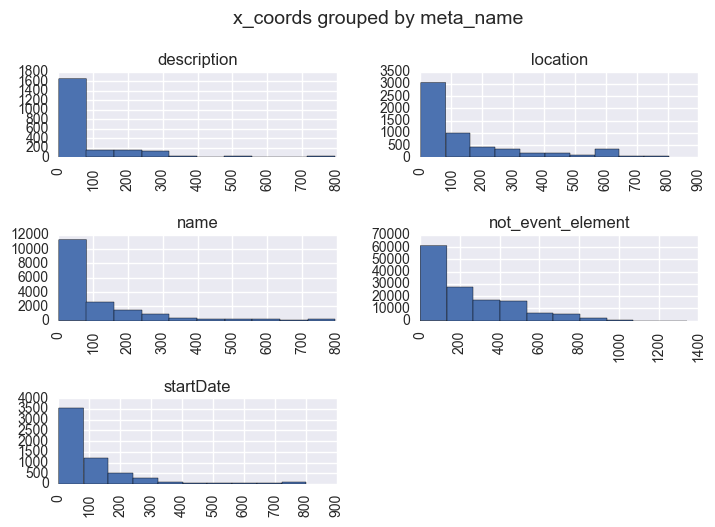

In [55]:
plot_feature_by_class(data, 'x_coords', 'meta_name')

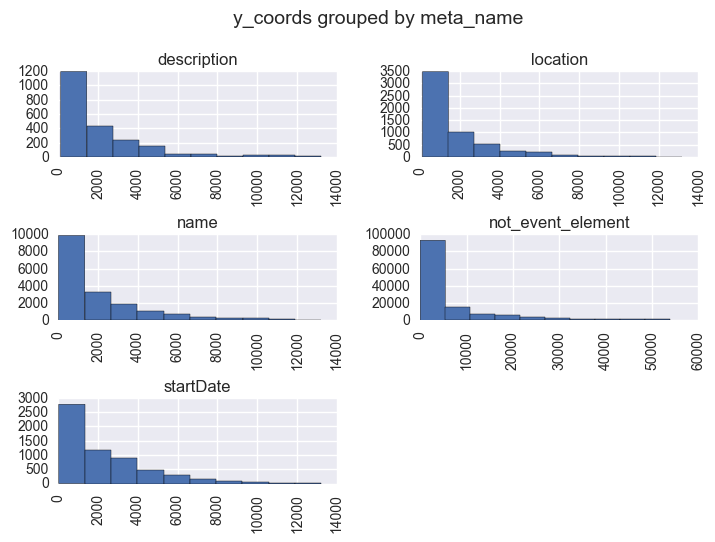

In [56]:
plot_feature_by_class(data, 'y_coords', 'meta_name')

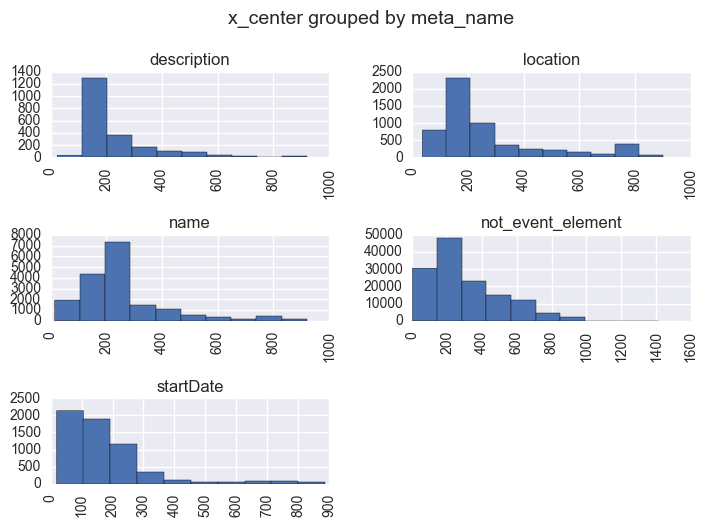

In [57]:
plot_feature_by_class(data, 'x_center', 'meta_name')

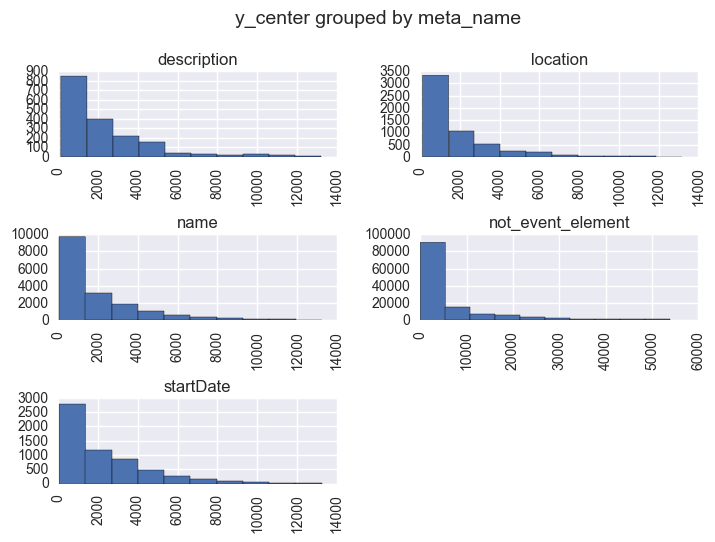

In [58]:
plot_feature_by_class(data, 'y_center', 'meta_name')

## Conclusions after grouped hist by class

* There are many features which look different for differnet classes and it's good!
* color, font family,  don't distinguish classes well
* num_siblings - is fine
* Original x and y coords also not good, but x_center is much better
* tag, font_size and font_weight are good
* Textual features are good as well. 


## Grouped summary statistics

In [35]:
cols = [col for col in data_num.columns if 'padding' not in col]
data_num[cols].groupby('meta_name').describe()

block_height    block_width        color_b  \
meta_name                                                              
description       count    1784.000000    2170.000000    2206.000000   
                  mean       65.537556     349.120276      54.436990   
                  std        44.929030     121.100181      56.479365   
                  min        10.000000       6.000000       0.000000   
                  25%              NaN            NaN       0.000000   
                  50%              NaN            NaN      51.000000   
                  75%              NaN            NaN      81.000000   
                  max       194.000000     893.000000     255.000000   
location          count    5653.000000    5772.000000    5780.000000   
                  mean       39.750044     260.905579      65.806574   
                  std        31.215797     127.358776      57.990162   
                  min         1.000000       1.000000       0.000000   
                  25%              NaN            NaN      28.000000   
                  50%              NaN            NaN      51.000000   
                  75%              NaN            NaN      95.000000   
                  max       193.000000     865.000000     255.000000   
name              count   17877.000000   18038.000000   18116.000000   
                  mean       38.479331     278.008538      78.708766   
                  std        29.980854     146.163343      72.077180   
                  min         1.000000       1.000000       0.000000   
                  25%              NaN            NaN      28.000000   
                  50%              NaN            NaN      51.000000   
                  75%              NaN            NaN     111.000000   
                  max       193.000000     889.000000     255.000000   
not_event_element count  132781.000000  135435.000000  135665.000000   
                  mean       23.771142     157.363126      94.449851   
                  std        13.568142     134.160766      88.183268   
                  min         0.000000       0.000000       0.000000   
                  25%              NaN            NaN       7.000000   
                  50%              NaN            NaN      60.000000   
                  75%              NaN            NaN     168.000000   
                  max        88.000000     867.000000     255.000000   
startDate         count    6056.000000    6103.000000    6105.000000   
                  mean       23.301849     128.210716      82.702048   
                  std        14.152083      93.232643      60.032188   
                  min         1.000000       1.000000       0.000000   
                  25%              NaN            NaN      51.000000   
                  50%              NaN            NaN      78.000000   
                  75%              NaN            NaN     102.000000   
                  max       193.000000     728.000000     255.000000   

                               color_g        color_r   digits_share  \
meta_name                                                              
description       count    2206.000000    2206.000000    2206.000000   
                  mean       54.402085      53.983681       0.020565   
                  std        56.701399      56.985368       0.046804   
                  min         0.000000       0.000000       0.000000   
                  25%         0.000000       0.000000       0.000000   
                  50%        51.000000      51.000000       0.000000   
                  75%        80.000000      80.000000       0.021888   
                  max       255.000000     255.000000       0.444444   
location          count    5780.000000    5780.000000    5780.000000   
                  mean       65.425087      66.532526       0.064409   
                  std        56.687576      61.146783       0.079948   
                  min         0.000000       0.000000       0.000

In [36]:
import seaborn as sns

* There are many features which look different for differnet classes and it's good!
* color, font family,  don't distinguish classes well
* num_siblings - is fine
* Original x and y coords also not good, but x_center is much better
* tag, font_size and font_weight are good
* Textual features are good as well. 

## Violins and Boxplot 

In [37]:
def violin(data_num, group, y):
    sns.violinplot(x=group, y=y, data=data_num, split=True, inner="quart", title='Test')
    sns.despine(left=True)
    sns.plt.title('{} distribution grouped by {}'.format(y, group))

In [38]:
def box(data_num, group, y):
    sns.boxplot(x=group, y=y, data=data_num)
    sns.despine(left=True)
    sns.plt.title('{} distribution grouped by {}'.format(y, group))


In [39]:
data_num.columns

Index(['tag', 'color_r', 'color_g', 'color_b', 'font_size', 'display',
       'font_weight', 'padding_top', 'padding_right', 'padding_left',
       'padding_bottom', 'font_family', 'text_align', 'line_height',
       'num_siblings', 'x_coords', 'y_coords', 'block_height', 'block_width',
       'height', 'width', 'text_len', 'num_punctuation', 'num_digits',
       'digits_share', 'num_upper', 'num_whitespace', 'x_center', 'y_center',
       'meta_name'],
      dtype='object')

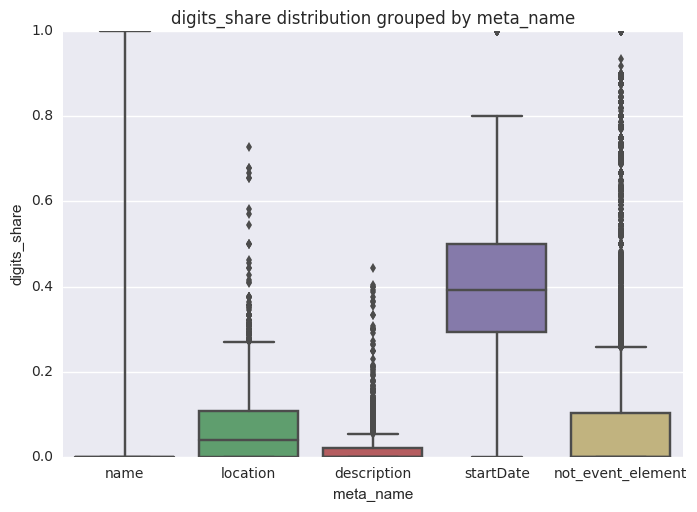

In [40]:
box(data_num, "meta_name", "digits_share")

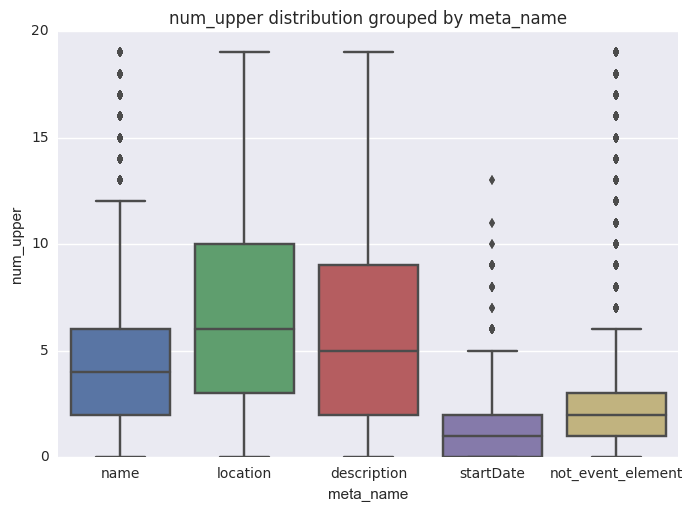

In [41]:
box(data_num, "meta_name", "num_upper")

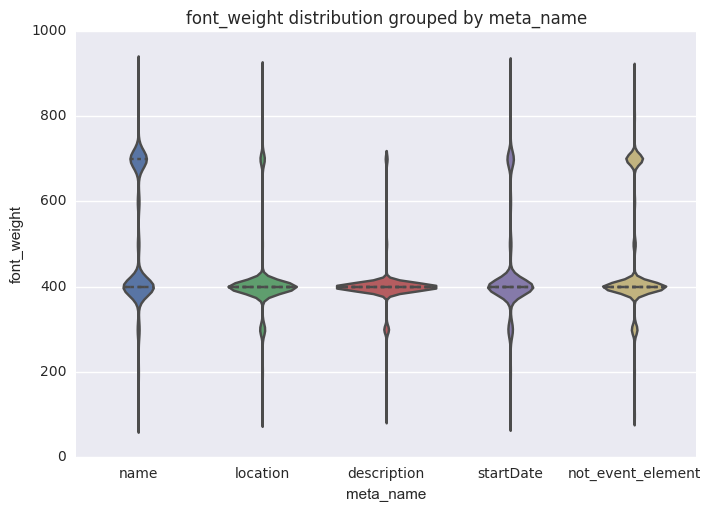

In [42]:
violin(data_num, "meta_name", "font_weight")

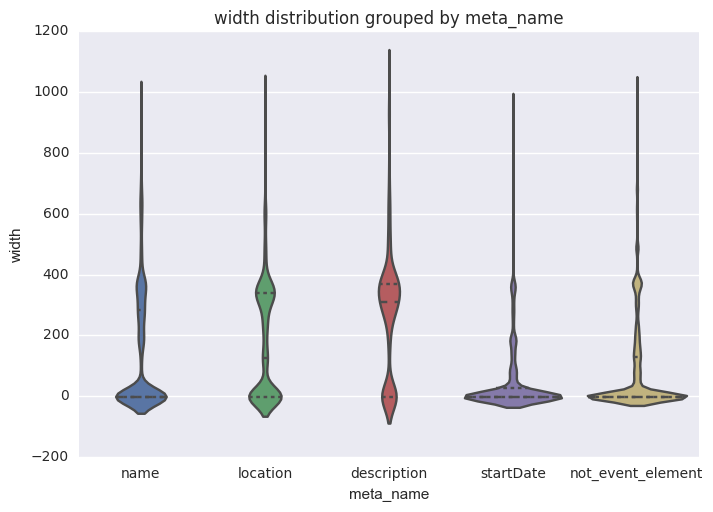

In [43]:
violin(data_num, "meta_name", "width")

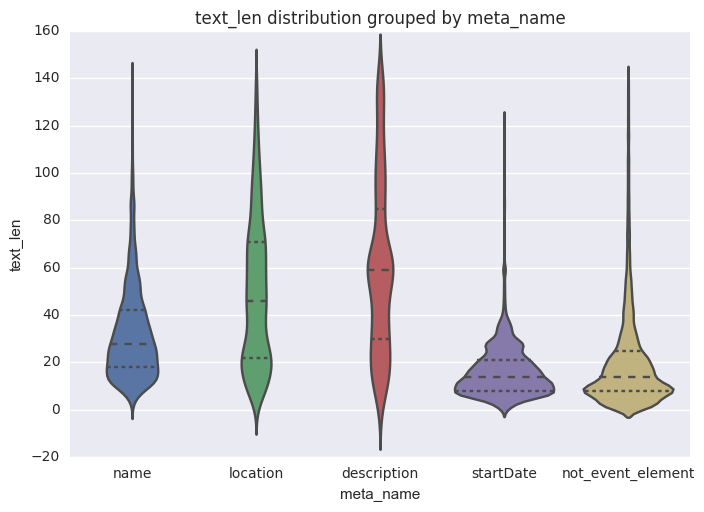

In [44]:
violin(data_num, "meta_name", "text_len")

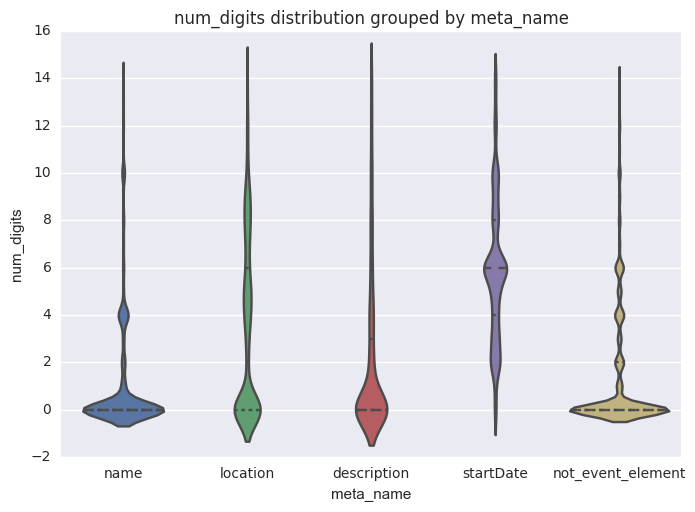

In [45]:
violin(data_num, "meta_name", "num_digits")

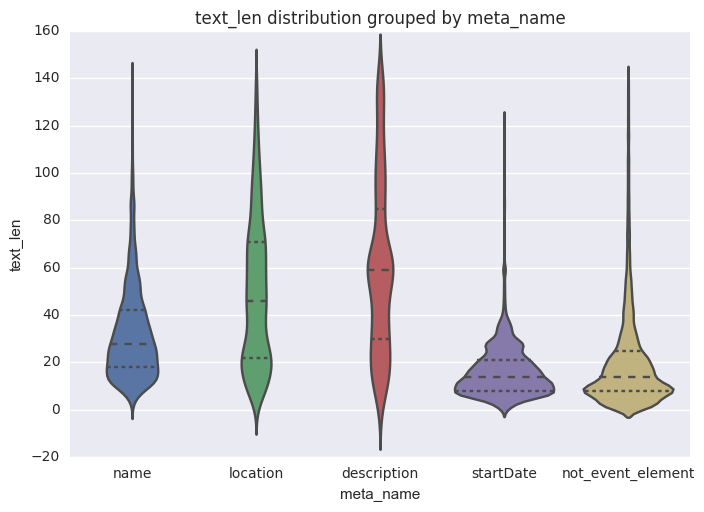

In [46]:
violin(data_num, "meta_name", "text_len")

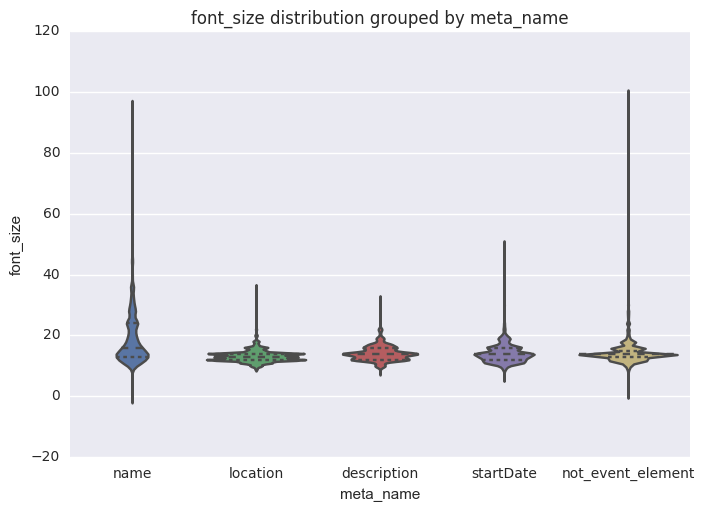

In [47]:
violin(data_num, "meta_name", "font_size")

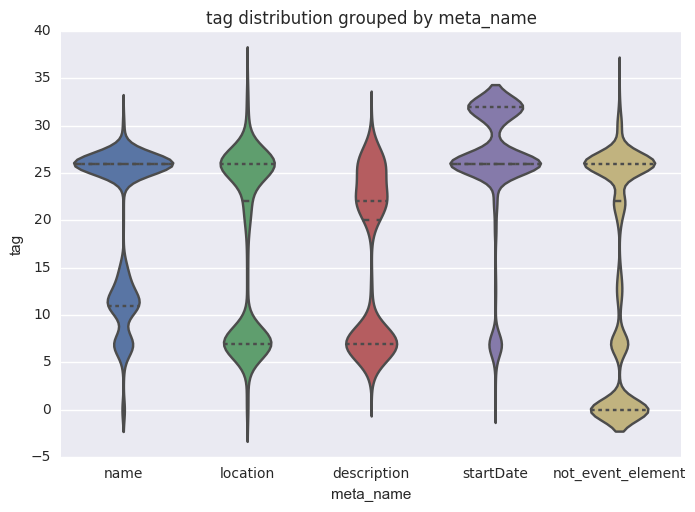

In [48]:
violin(data_num, "meta_name", "tag")

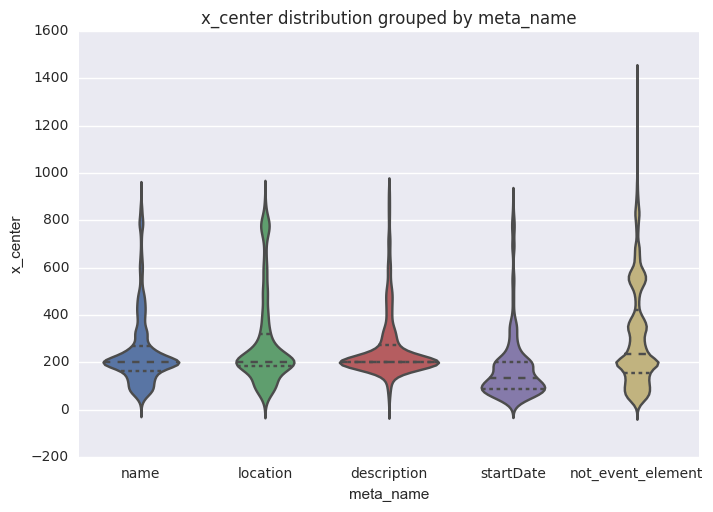

In [49]:
violin(data_num, "meta_name", "x_center")

In [50]:
data_num.columns

Index(['tag', 'color_r', 'color_g', 'color_b', 'font_size', 'display',
       'font_weight', 'padding_top', 'padding_right', 'padding_left',
       'padding_bottom', 'font_family', 'text_align', 'line_height',
       'num_siblings', 'x_coords', 'y_coords', 'block_height', 'block_width',
       'height', 'width', 'text_len', 'num_punctuation', 'num_digits',
       'digits_share', 'num_upper', 'num_whitespace', 'x_center', 'y_center',
       'meta_name'],
      dtype='object')

In [51]:
exclude = ['tag', 'color_r', 'color_g', 'color_b', 'display', 'padding_top', 'padding_right', 'padding_left', 'padding_bottom', 'font_family', 'meta_name']
data_num_corr = data_num[data_num.columns.difference(exclude)]

## List of the most significant correlations

In [53]:
df_cor = data_num_corr.corr()

In [54]:
indices = np.where(df_cor > 0.5)
indices = [(df_cor.index[x], df_cor.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

Pairs with corr > 0.5

In [56]:
indices

[('block_height', 'height'),
 ('block_width', 'num_whitespace'),
 ('block_width', 'text_len'),
 ('block_width', 'width'),
 ('digits_share', 'num_digits'),
 ('height', 'width'),
 ('num_digits', 'num_punctuation'),
 ('num_punctuation', 'text_len'),
 ('num_upper', 'num_whitespace'),
 ('num_upper', 'text_len'),
 ('num_whitespace', 'text_len'),
 ('x_center', 'x_coords'),
 ('y_center', 'y_coords')]

List of interesting correlations: 
* 'block_width', 'text_len'

In [70]:
def lin(data_num, x, y):
    f, ax = plt.subplots(figsize=(5, 6))
    sns.regplot(x=x, y=y, data=data_num, ax=ax)
    sns.plt.title('{} and {} have linear relationships'.format(x, y))

In [71]:
data_num_smpl = data_num.sample(500)

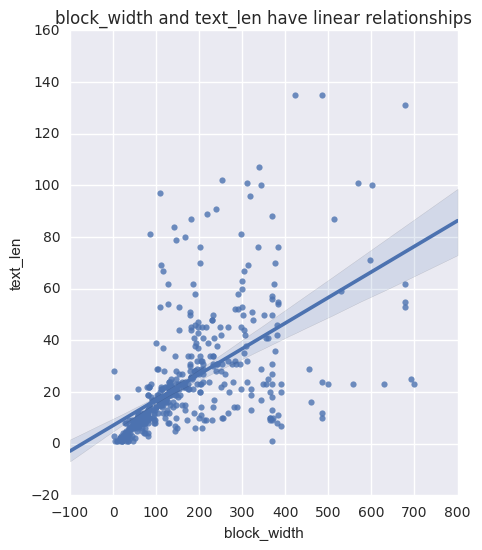

In [73]:
lin(data_num_smpl, 'block_width', 'text_len')

In [86]:
popular_tags = data_num.tag.value_counts().head(7).to_frame().reset_index()

In [91]:
idx = popular_tags['index']

In [95]:
%store -r le_tag

In [93]:
data_num_pop_tags = data_num[data_num.tag.isin(idx)]

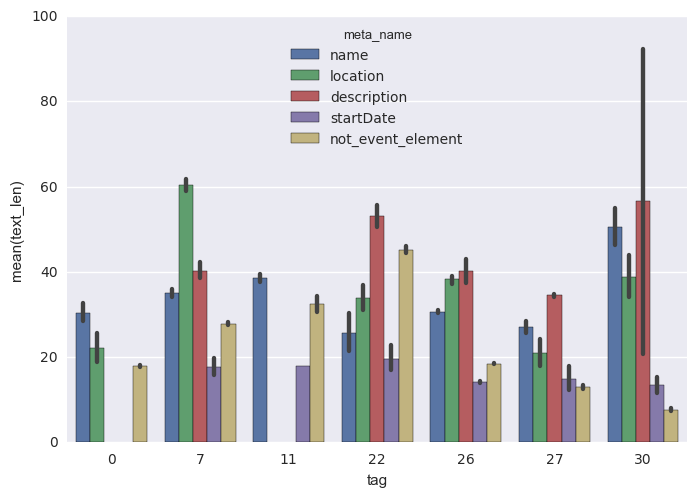

In [94]:
sns.barplot(x="tag", y="text_len", hue="meta_name", data=data_num_pop_tags);

In [ ]:
import h5py
DATA_NUM_CL_WITH_NAN_TXT.to_hdf('store.h5', 'DATA_NUM_CL_WITH_NAN_TXT')